<a href="https://colab.research.google.com/github/veeily812/DataAnalystProject/blob/main/House_Price_Prediction_with_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download Libs**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**ANNs model**

In [ ]:
#Set random seed
torch.manual_seed(42)

In [ ]:
data = pd.read_csv('House Prices Train Data.csv')

In [ ]:
# Preprocess the Data
X = data[["GrLivArea", "BedroomAbvGr"]].copy()
y = data["SalePrice"].copy()

In [ ]:
# Handel Missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

In [ ]:
#Normalize the features and target to [0,1]
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())

In [ ]:
#Convert to Pytorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values.reshape(-1,1), dtype=torch.float32)

In [ ]:
#Define NNs with Batch Normalization
class HousingPricePredictor(nn.Module):
    def __init__(self):
        super(HousingPricePredictor, self).__init__()
        self.linear1 = nn.Linear(2, 4)
        self.bn1 = nn.BatchNorm1d(4)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(4, 1)

    def forward(self,x):
        x = self.linear1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x




In [ ]:
model = HousingPricePredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Step 5: Batch Processing and Training Loop
batch_size = 32  # Larger batch size for the larger dataset
epochs = 1000
losses = []  # To store loss values for visualization

for epoch in range(epochs):
    epoch_loss = 0
    for i in range(0, len(X), batch_size):
        # Get the batch
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights

        epoch_loss += loss.item()

    # Average loss for the epoch
    epoch_loss /= (len(X) // batch_size)
    losses.append(epoch_loss)

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

Epoch 100/1000, Loss: 0.0055
Epoch 200/1000, Loss: 0.0055
Epoch 300/1000, Loss: 0.0055
Epoch 400/1000, Loss: 0.0055
Epoch 500/1000, Loss: 0.0055
Epoch 600/1000, Loss: 0.0055
Epoch 700/1000, Loss: 0.0055
Epoch 800/1000, Loss: 0.0055
Epoch 900/1000, Loss: 0.0055
Epoch 1000/1000, Loss: 0.0055


In [ ]:
# Step 6: Test the Model (Make Predictions)
with torch.no_grad():  # Disable gradient computation for inference
    predictions = model(X)

# Denormalize predictions and actual values for interpretation
y_min, y_max = data['SalePrice'].min(), data['SalePrice'].max()
predicted_prices = predictions.numpy().flatten() * (y_max - y_min) + y_min
actual_prices = y.numpy().flatten() * (y_max - y_min) + y_min

# Print a sample of predictions vs actual prices
print("\nSample Predictions vs Actual Prices (in $):")
for i in range(5):  # Show first 5 houses
    print(f"House {i+1}: Size={data['GrLivArea'].iloc[i]} sq ft, Bedrooms={data['BedroomAbvGr'].iloc[i]}, "
          f"Predicted Price={predicted_prices[i]:.1f}, Actual Price={actual_prices[i]:.1f}")


Sample Predictions vs Actual Prices (in $):
House 1: Size=1710 sq ft, Bedrooms=3, Predicted Price=202964.8, Actual Price=208500.0
House 2: Size=1262 sq ft, Bedrooms=3, Predicted Price=156772.9, Actual Price=181500.0
House 3: Size=1786 sq ft, Bedrooms=3, Predicted Price=212466.7, Actual Price=223500.0
House 4: Size=1717 sq ft, Bedrooms=3, Predicted Price=203840.0, Actual Price=140000.0
House 5: Size=2198 sq ft, Bedrooms=4, Predicted Price=231151.1, Actual Price=250000.0


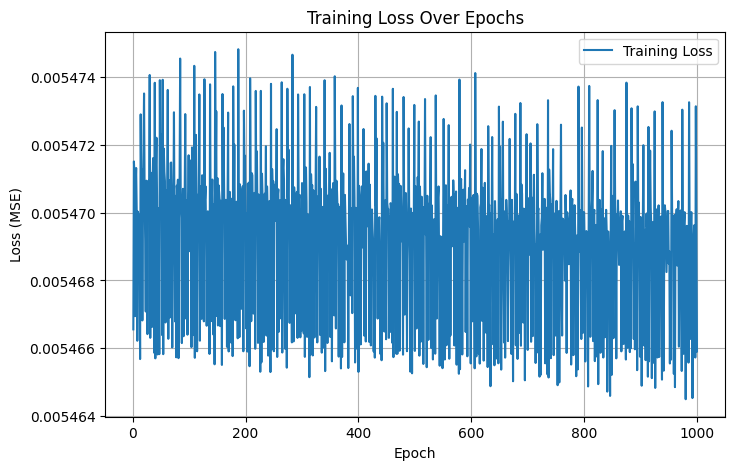

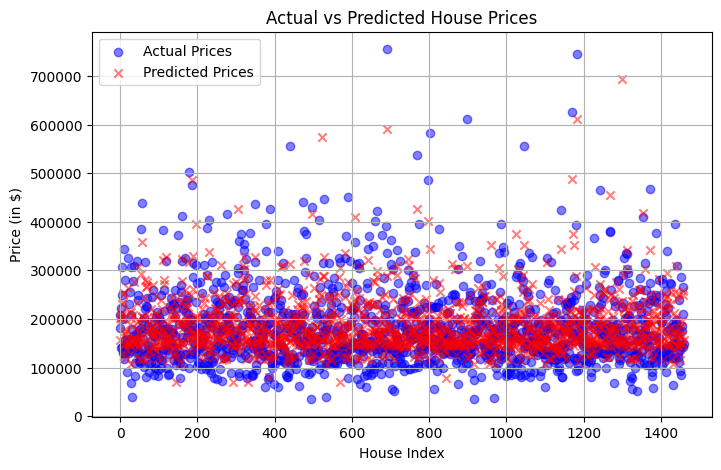

In [ ]:
# Step 7: Visualize the Training Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()
plt.show()

# Step 8: Visualize Predictions vs Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(range(len(actual_prices)), actual_prices, label='Actual Prices', color='blue', marker='o', alpha=0.5)
plt.scatter(range(len(predicted_prices)), predicted_prices, label='Predicted Prices', color='red', marker='x', alpha=0.5)
plt.xlabel('House Index')
plt.ylabel('Price (in $)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.legend()
plt.show()

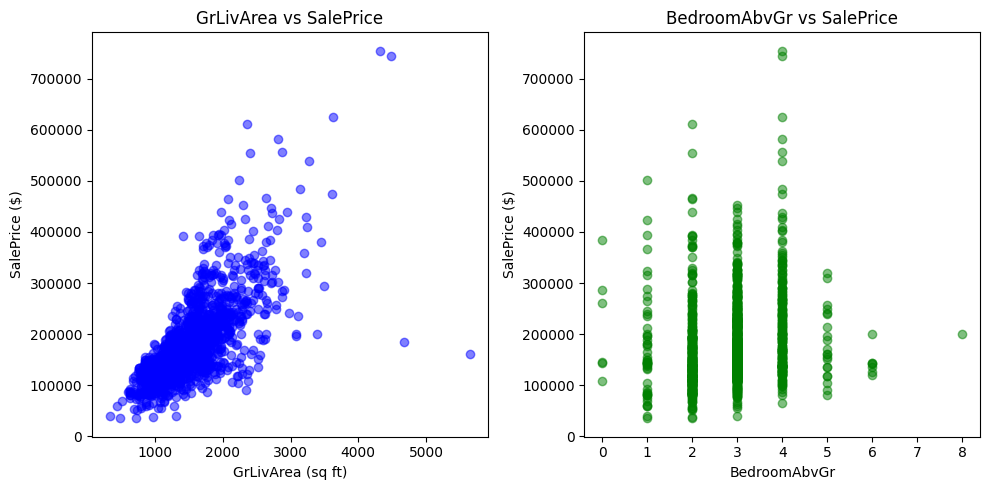

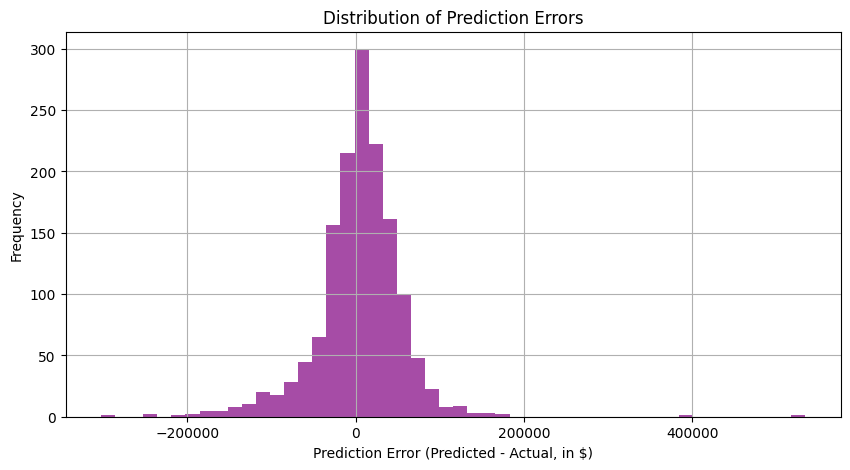

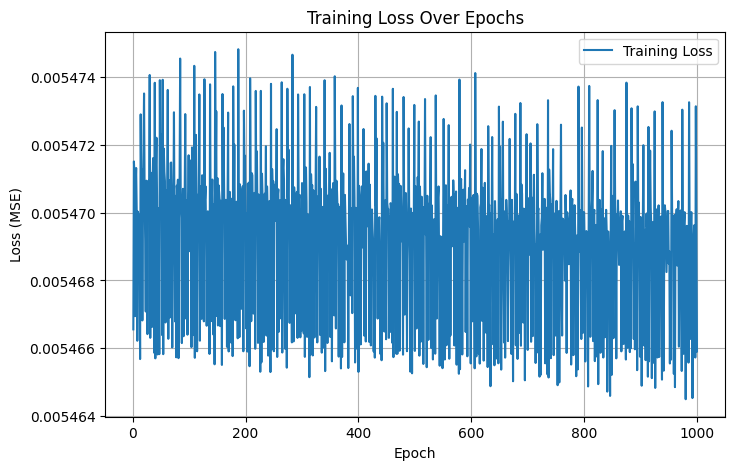

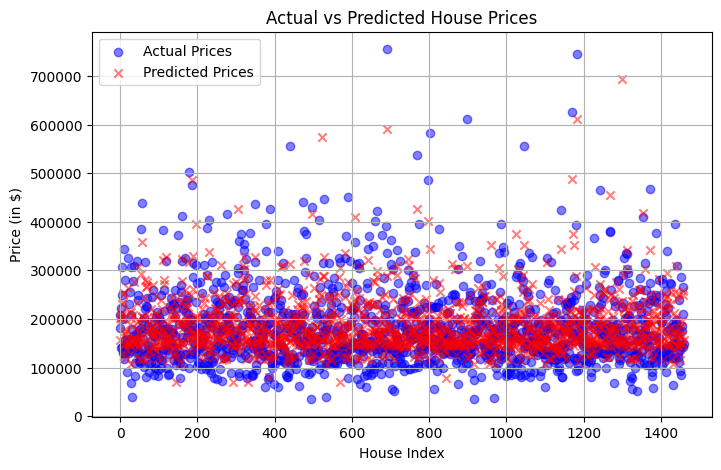

In [ ]:
# Step 8: New Visualization 2 - Feature vs Target Scatter Plots
# Plot GrLivArea vs SalePrice
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.5, color='blue')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('SalePrice ($)')
plt.title('GrLivArea vs SalePrice')

# Plot BedroomAbvGr vs SalePrice
plt.subplot(1, 2, 2)
plt.scatter(data['BedroomAbvGr'], data['SalePrice'], alpha=0.5, color='green')
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice ($)')
plt.title('BedroomAbvGr vs SalePrice')
plt.tight_layout()
plt.show()

# Step 9: New Visualization 3 - Prediction Error Distribution (Histogram)
errors = predicted_prices - actual_prices
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=50, color='purple', alpha=0.7)
plt.xlabel('Prediction Error (Predicted - Actual, in $)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

# Step 10: Original Visualization 1 - Training Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()
plt.show()

# Step 11: Original Visualization 2 - Actual vs Predicted Values
plt.figure(figsize=(8, 5))
plt.scatter(range(len(actual_prices)), actual_prices, label='Actual Prices', color='blue', marker='o', alpha=0.5)
plt.scatter(range(len(predicted_prices)), predicted_prices, label='Predicted Prices', color='red', marker='x', alpha=0.5)
plt.xlabel('House Index')
plt.ylabel('Price (in $)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.legend()
plt.show()